In [1]:
from apqc.sample_data import get_2d_toy_data

D = 2
N = 3040
batch_manual = 1000

x_gen, y = get_2d_toy_data("noisy_moons", n_samples=N, noise=0.15)

In [2]:
import numpy as np

x_gen = np.concatenate([x_gen, x_gen.max(0).reshape(1, -1), x_gen.min(0).reshape(1, -1)], axis=0)
y = np.concatenate([y, [-1], [-1]])

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_gen = scaler.fit_transform(x_gen)

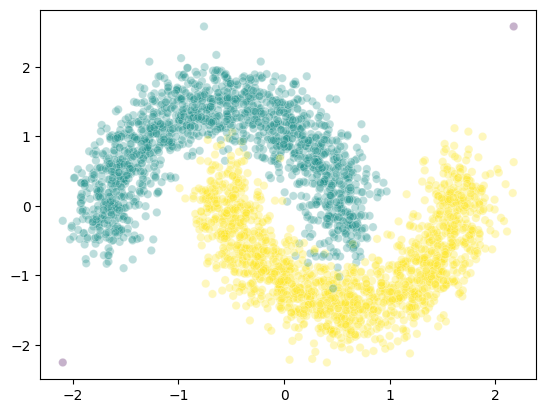

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=x_gen[:, 0], y=x_gen[:, 1], alpha=0.3, c=y)
plt.show()

In [5]:
from apqc.pqc import PQC
from apqc.density_estimation import DensityEstimator

pqc = PQC(data_gen=x_gen, float_type=32, batch=batch_manual, force_cpu=True)
d_e = DensityEstimator(data_gen=pqc.data_gen, batch=batch_manual, scale=pqc.scale)

2023-09-25 12:09:09.784446: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-25 12:09:10.230732: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-25 12:09:10.239086: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-25 12:09:14.879007: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
init_log_sigmas = np.ones((d_e.data_gen.shape[0], 1)) * np.log(3)
ll = d_e.fit(preset_init=init_log_sigmas)

In [7]:
log_sigmas = d_e.log_sigma.value()
sigmas = np.exp(log_sigmas)

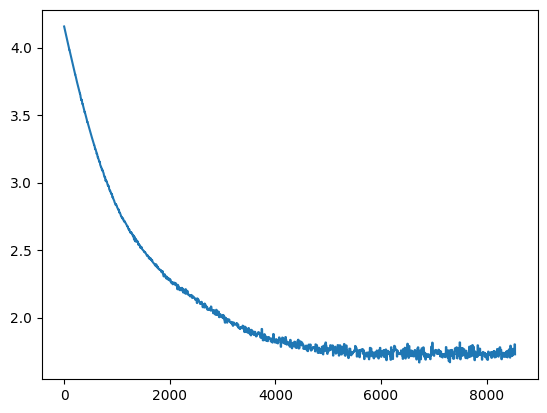

/tmp/ipykernel_1228065/2279177494.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


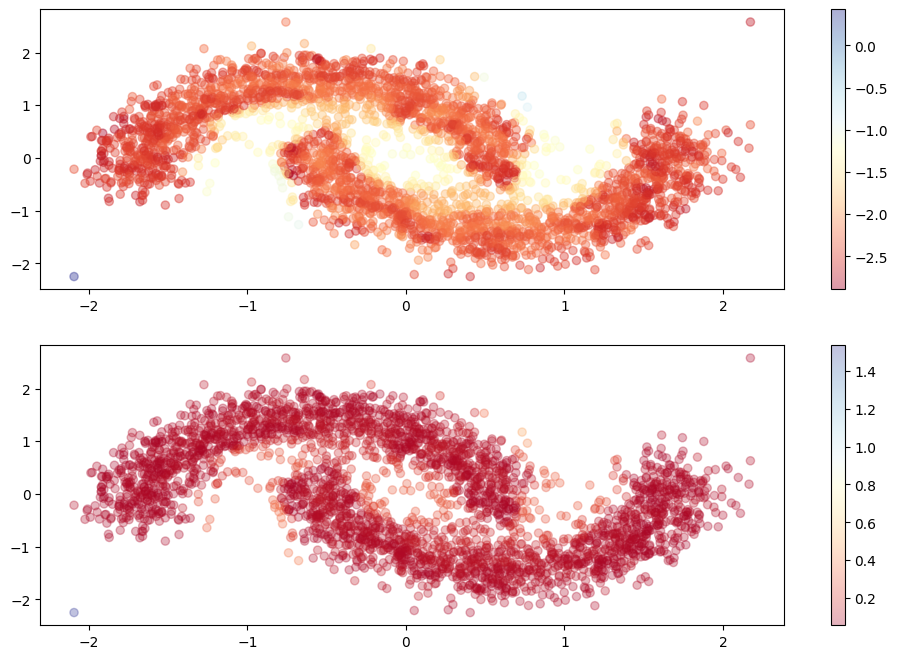

In [8]:
plt.plot(ll)
plt.show()

cm = plt.cm.get_cmap('RdYlBu')
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

sc0 = axs[0].scatter(x_gen[:, 0], x_gen[:, 1], c=log_sigmas, vmin=min(log_sigmas), vmax=max(log_sigmas),
                        s=35, cmap=cm, alpha=0.4)
sc1 = axs[1].scatter(x_gen[:, 0], x_gen[:, 1], c=sigmas, vmin=min(sigmas), vmax=max(sigmas),
                        s=35, cmap=cm, alpha=0.3)
fig.colorbar(sc0, ax=axs[0])
fig.colorbar(sc1, ax=axs[1])
plt.show()